In [118]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import glob

In [121]:
mes = input('Ingrese el mes: ')
año = input('Ingrese el año: ')
mesActual = pd.read_csv(mes+' '+ año +'.csv')
mesActual.drop('Unnamed: 0',axis=1,inplace = True)
mesActual = mesActual[mesActual['Hora']!='18:00']

Ingrese el mes: Mayo
Ingrese el año: 2020


In [122]:
mesActual

,Fecha,Hora,Potencia [kW],Insolacion [W/m2],Temperatura de modulos [C],Temperatura ambiente [C],Insolacion media [W/m2],Temp Ambiente [C]
0,1/05/2020,6:00,0.00,2.51,11.78,11.813286,3.649091,11.813286
1,1/05/2020,6:05,0.00,3.58,11.89,11.842684,4.662727,11.842684
2,1/05/2020,6:10,0.01,4.80,11.83,11.862109,5.774545,11.862109
3,1/05/2020,6:15,0.06,6.13,12.01,11.869368,6.998182,11.869368
4,1/05/2020,6:20,0.11,7.46,12.10,11.877645,8.250909,11.877645
...,...,...,...,...,...,...,...,...
4489,31/05/2020,17:35,0.06,5.98,14.05,13.899084,11.339091,13.899084
4490,31/05/2020,17:40,0.04,5.36,13.62,13.868143,9.588182,13.868143
4491,31/05/2020,17:45,0.02,4.83,13.58,13.806243,7.475455,13.806243
4492,31/05/2020,17:50,0.00,4.44,13.73,13.737793,5.237273,13.737793


## Creación del dataframe con todos los datos por hora

In [263]:
#Función para generar un dataframe con los datos de Energia en kWh 
#y de irradiación en Wh/m2 por cada hora del día

def nuevoFrame(mesActual):
    i = 0
    j = 0
    energia = []
    irradiacion = []
    fechas = []
    horas = []
    while i<len(mesActual):
        fechas.append(mesActual['Fecha'][i])
        horas.append(mesActual['Hora'][i])
        energia.append(mesActual['Potencia [kW]'][i:i+12].sum()/12)
        irradiacion.append(mesActual['Insolacion [W/m2]'][i:i+12].sum()/12)
        i+=12
    datos = pd.DataFrame({'Fecha':fechas,'Hora':horas,'Energia [kWh]':energia,'Irradiacion [Wh/m2]':irradiacion})
    return datos

In [249]:
datos.describe()

,Energia [kWh],Irradiacion [Wh/m2]
count,372.000000,372.000000
mean,12.713685,217.948423
std,9.187529,158.236031
min,0.117500,5.902500
25%,5.627708,98.527083
50%,11.559167,194.183333
75%,17.667500,305.939375
max,54.263333,946.122500


In [254]:
# Se leen los diferentes archivos csv que existen en la carpeta actual
archivos = glob.glob('*.csv')
archivos

['Abril 2020.csv',
 'Agosto 2020.csv',
 'Diciembre 2019.csv',
 'Diciembre 2020.csv',
 'Enero 2020.csv',
 'Febrero 2020.csv',
 'Julio 2020.csv',
 'Junio 2020.csv',
 'Marzo 2020.csv',
 'Mayo 2020.csv',
 'Noviembre 2019.csv',
 'Noviembre 2020.csv',
 'Octubre 2019.csv',
 'Octubre 2020.csv',
 'Septiembre 2020.csv']

### Nuevo dataframe:

In [266]:
# Se leen los diferentes archivos y se ejecuta sobre cada uno la función 'nuevoFrame'
# Luego se concatenan cada uno de estos dataFrames en uno solo
inicio = 0

for name in archivos:
    mesActual = pd.read_csv(name)      #Lectura
    mesActual = nuevoFrame(mesActual)  #Ejecución
    
    if inicio == 0:
        dataFrame = mesActual
    else:
        dataFrame = pd.concat([dataFrame,mesActual])
    inicio+=1

In [272]:
dataFrame.to_csv('Todo por hora.csv')

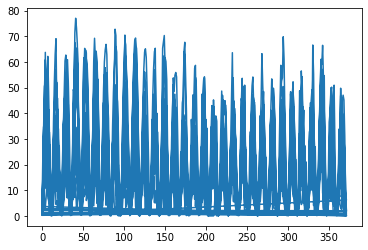

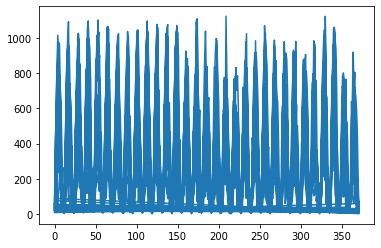

In [271]:
dataFrame['Energia [kWh]'].plot()
plt.show()
dataFrame['Irradiacion [Wh/m2]'].plot()

In [273]:
dataFrame

,Fecha,Hora,Energia [kWh],Irradiacion [Wh/m2]
0,1/04/2020,6:00,1.005833,22.875000
1,1/04/2020,7:00,6.593333,115.340833
2,1/04/2020,8:00,15.385833,269.870000
3,1/04/2020,9:00,6.713333,118.296667
4,1/04/2020,10:00,3.472500,59.250000
...,...,...,...,...
355,30/09/2020,13:00,39.585000,741.970833
356,30/09/2020,14:00,24.003333,398.950000
357,30/09/2020,15:00,10.800833,170.588333
358,30/09/2020,16:00,4.070000,72.150833


In [274]:
horas = dataFrame['Hora'].unique()
horas

array(['6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00'], dtype=object)

In [305]:
irr_prom = []
ene_prom = []

irr_std = []
ene_std = []

for h in horas:
    df = dataFrame[dataFrame['Hora']==h]
    
    energy = df['Energia [kWh]'].mean()
    irradiance  =df['Irradiacion [Wh/m2]'].mean()
    
    energy_std = df['Energia [kWh]'].std()
    irradiance_std  =df['Irradiacion [Wh/m2]'].std()
    
    ene_prom.append(energy)
    irr_prom.append(irradiance)
    
    ene_std.append(energy_std)
    irr_std.append(irradiance_std)


In [308]:
porHora = pd.DataFrame({'Hora':horas,'Energia Prom [kWh]':ene_prom,'Irradiacion Prom [Wh/m2]':irr_prom,
                        'Energia desv [kWh]': ene_std,'Irradiacion desv [Wh/m2]':irr_std})
porHora.set_index('Hora',inplace = True)
porHora

,Energia Prom [kWh],Irradiacion Prom [Wh/m2],Energia desv [kWh],Irradiacion desv [Wh/m2]
Hora,,,,
6:00,1.669605,36.732636,1.132852,22.037113
7:00,9.283936,189.370182,4.759372,109.302048
8:00,19.101243,354.244176,9.229886,176.658672
9:00,25.971177,463.021567,11.903278,215.963951
10:00,30.415977,530.439156,14.084939,247.390029
11:00,31.178832,535.630262,15.108984,263.046497
12:00,28.835844,480.730073,15.478485,259.766559
13:00,24.735045,350.265122,14.606989,195.562491
14:00,19.001918,238.343834,11.545151,150.413175


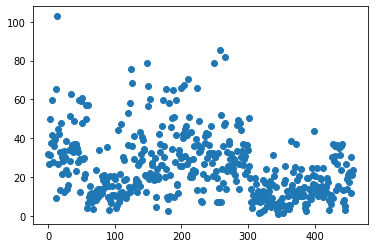

In [323]:
plt.scatter(range(len(dataFrame[dataFrame['Hora']=='10:00'])),dataFrame[dataFrame['Hora']=='17:00']['Irradiacion [Wh/m2]'])